In [69]:
using BoseHubbardQuantum
using Plots

# when module builds then use below
#using SpectralStatistics

using Polynomials
using SpecialFunctions
includet("../../src/base/base.jl")
includet("../../src/statistics/statistics.jl")
includet("../../src/models/models.jl")

In [68]:
import Pkg; Pkg.add("SpecialFunctions")

   Resolving package versions...


    Updating `/local/home/goran/MEGA/phd/Julia/SpectralStatistics.jl/notebooks/spectral_bose_hubbard/Project.toml`
  [276daf66] + SpecialFunctions v2.1.7
  No Changes to `/local/home/goran/MEGA/phd/Julia/SpectralStatistics.jl/notebooks/spectral_bose_hubbard/Manifest.toml`


In [12]:
import Pkg; Pkg.add("Polynomials")

    Updating registry at `~/.julia/registries/General`


    Updating git-repo `https://github.com/JuliaRegistries/General.git`


   Resolving package versions...


    Updating 

`/local/home/goran/MEGA/phd/Julia/SpectralStatistics.jl/notebooks/spectral_bose_hubbard/Project.toml`
  [f27b6e38] + Polynomials v3.2.0
  No Changes to `/local/home/goran/MEGA/phd/Julia/SpectralStatistics.jl/notebooks/spectral_bose_hubbard/Manifest.toml`


Precompiling project...


  ✓ SpectralStatistics
  1 dependency successfully precompiled in 3 seconds. 164 already precompiled.


In [48]:
L = 10
N = 5
basis = LtrAscBasis(L, N);
length(basis)

2002

In [49]:
bhh = BoseHubbardHamiltonian(chain_graph(L), basis);

In [ ]:
# spmatrix(bhh, J, U)
# where J are the hopping terms (L-1 in total)
# U are the on-site interactions (L in total)
H = spmatrix(bhh, vcat([1.5], ones(L-2)), 2.4 .* ones(L))

2002×2002 SparseMatrixCSC{Float64, Int64} with 14620 stored entries:
⢻⣶⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠻⣿⣿⣆⢢⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠨⣙⠻⣦⣉⠦⠀⢤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠣⡜⢿⣷⣦⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⣄⠈⠛⠻⣦⡀⠀⠙⠆⠀⠠⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠳⣄⠀⠈⢿⣷⣦⢀⠀⠀⠈⠳⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠳⠄⠈⢛⡻⢎⡳⠄⠀⠀⠈⠣⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠙⠎⢻⣶⡀⠀⠀⠀⠈⠲⡄⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⢦⡀⠀⠀⠀⠈⢻⣶⣤⡀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⠦⡀⠀⠀⠀⠻⠿⣧⡳⣄⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢢⡀⠀⠀⠙⢮⡻⣮⡝⢦⡀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⠳⣍⠻⣦⣉⠀⠀⠀⠀⠀⠀⠈⠳⣄⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⠀⠀⠀⠀⠈⠃⠘⠿⣧⡀⠀⠀⠀⠀⠀⠀⠈⠳⡄⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠈⢿⣷⣤⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠀⠻⡿⣯⡳⡄⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠀⠙⠮⢻⣶⡙⢦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⢦⡀⠀⠀⠀⠀⠈⠳⣌⠻⣦⣍⠙⢦⡀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠙⠦⠀⠀⠀⠀⠀⠈⣇⠙⠿⣧⡀⠙⠦⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠳⣄⠈⢻⣶⣄⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠃⠀⠙⢿⣷

In [51]:
evs = eigvals!(Array(H))

2002-element Vector{Float64}:
 -3.8781419571304054
 -3.613490805292919
 -3.387681831758261
 -3.3194618352228655
 -3.2094453113198735
 -3.095259414121287
 -3.0846249208070535
 -3.017539626475219
 -2.9981126587608142
 -2.913771557881656
  ⋮
 24.260601953470577
 24.26074008039814
 24.260886038933915
 24.261070454910087
 24.2612539170148
 24.261395944216694
 24.26159707826708
 24.294387218109918
 24.42359268568583

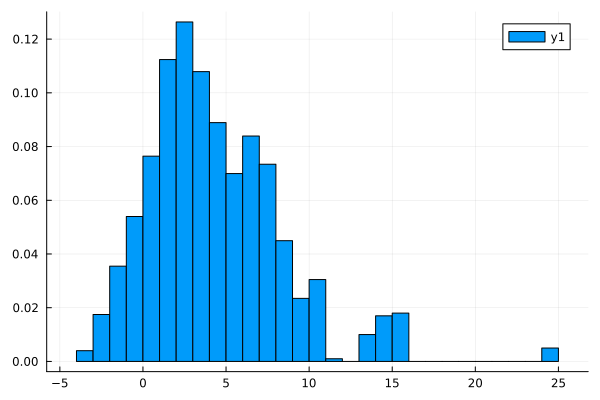

In [52]:
histogram(evs;
    normalize=:pdf,
)

In [53]:
evs_unf = unfold(RealSpectrum(evs), 10) # is not sorted anymore

UnfoldedSpectrum([-67.55137582888078, -32.03393752886277, -8.973703556257355, -3.1478305031106184, 5.260541642254897, 12.823561748330167, 13.47279051035266, 17.368500031538158, 18.43497212411506, 22.76883309783552  …  2004.3387874499363, 1992.6880767583532, 1992.6921923905543, 1992.6965818498725, 1992.7021873408826, 1992.7078297535068, 1992.7122429857475, 1992.7185602939744, 1994.8218217657404, 2025.4781246201833])

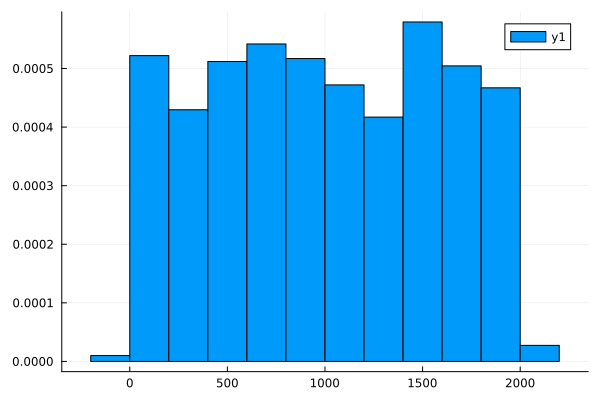

In [54]:
histogram(evs_unf.data;
    normalize=:pdf,
)

How to plot estimated level density by `unfold`??

In [59]:
level_spacing(evs_unf) # has negative values

2001-element Vector{Float64}:
  35.51743830001801
  23.060233972605417
   5.825873053146736
   8.408372145365515
   7.56302010607527
   0.6492287620224921
   3.8957095211854984
   1.0664720925769018
   4.3338609737204585
   4.1315028419567135
   ⋮
 -11.650710691583072
   0.004115632201092012
   0.004389459318190347
   0.005605491010101105
   0.005642412624183635
   0.004413232240722209
   0.0063173082269258884
   2.103261471766018
  30.656302854442856

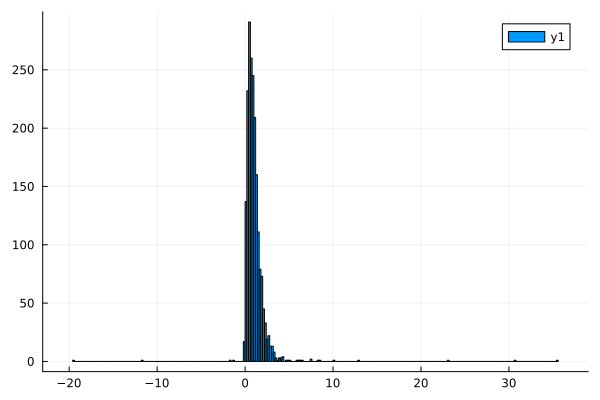

In [60]:
histogram(level_spacing(evs_unf)) # shows negative eigenvalues

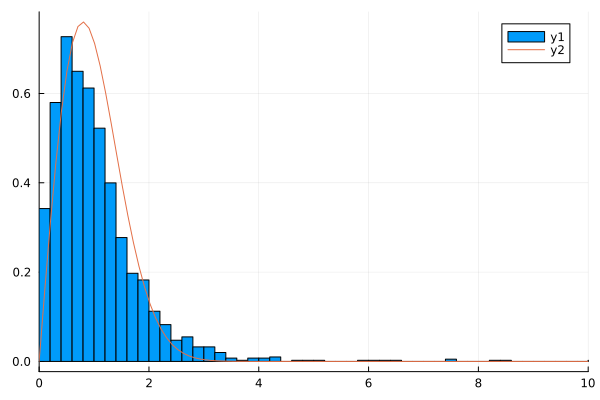

In [71]:
histogram(level_spacing(evs_unf);
    xlims=(0,10),
    normalize=:pdf,
)
xs = range(0,10;length=100)
plot!(xs, (x->level_spacing_pdf(GOE(), x)).(xs)) # not very convenient, better level_spacing_pdf.(GOE(), xs)) ??